In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

from scipy import stats
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

import acquire
from acquire import get_connection
from acquire import acquire_zillow

import wrangle
from wrangle import clean_zillow
from wrangle import split_zillow

import scale
from scale import visualize_scaled_date

In [2]:
df = acquire_zillow()

In [3]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
0,1125.0,3.0,2.0,NaN,289445.0
1,1316.0,3.0,2.0,5672.0,205123.0
2,1458.0,3.0,2.0,8284.0,136104.0
3,1766.0,3.0,2.0,25082.0,810694.0
4,1421.0,2.0,1.0,6707.0,35606.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38582 entries, 0 to 38581
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  38474 non-null  float64
 1   bedroomcnt                    38582 non-null  float64
 2   bathroomcnt                   38582 non-null  float64
 3   lotsizesquarefeet             34218 non-null  float64
 4   taxvaluedollarcnt             38581 non-null  float64
dtypes: float64(5)
memory usage: 1.5 MB


In [5]:
df = clean_zillow(df)

In [6]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
0,1125.0,3.0,2.0,0.0,289445.0
1,1316.0,3.0,2.0,5672.0,205123.0
2,1458.0,3.0,2.0,8284.0,136104.0
3,1766.0,3.0,2.0,25082.0,810694.0
4,1421.0,2.0,1.0,6707.0,35606.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38582 entries, 0 to 38581
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  38582 non-null  float64
 1   bedroomcnt                    38582 non-null  float64
 2   bathroomcnt                   38582 non-null  float64
 3   lotsizesquarefeet             38582 non-null  float64
 4   taxvaluedollarcnt             38582 non-null  float64
dtypes: float64(5)
memory usage: 1.8 MB


### Aquired Data
    - opbained data from the zillow database through a SQl Query
### SQL Query =  
    '''
    SELECT calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt, lotsizesquarefeet, taxvaluedollarcnt
    from  properties_2017
    join predictions_2017 using(parcelid)
    where transactiondate between "2017-05-01" and "2017-08-31"
    and propertylandusetypeid between 260 and 266
    or propertylandusetypeid between 273 and 279
    and not propertylandusetypeid = 274
    and unitcnt = 1;
                        
    '''
    
### Wrangle
    def clean_zillow(df):
    '''
    Takes in a df of zillow_data and cleans the data appropriatly by dropping null values in each column if < 80 percent,
    fills any extra nan with 0,
    return: df, a cleaned pandas data frame.
    '''
    after we have cleaned the data we are left with 38582 records
    

In [8]:
train, validate, test = split_zillow(df)

In [9]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
34440,993.0,2.0,1.0,27420.0,332874.0
9092,1326.0,3.0,2.0,4400.0,444382.0
6369,1414.0,3.0,2.5,0.0,225407.0
30976,1744.0,4.0,3.0,4558.0,166437.0
8815,2966.0,4.0,3.0,8050.0,638507.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 34440 to 16893
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  21605 non-null  float64
 1   bedroomcnt                    21605 non-null  float64
 2   bathroomcnt                   21605 non-null  float64
 3   lotsizesquarefeet             21605 non-null  float64
 4   taxvaluedollarcnt             21605 non-null  float64
dtypes: float64(5)
memory usage: 1012.7 KB


In [11]:
train.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
count,21605.000000,21605.000000,21605.000000,2.160500e+04,2.160500e+04
mean,1754.186762,3.006897,2.270724,2.558179e+04,4.952424e+05
std,940.546070,1.030456,0.947791,9.349446e+04,6.553387e+05
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+03
25%,1170.000000,2.000000,2.000000,5.032000e+03,2.081870e+05
50%,1521.000000,3.000000,2.000000,6.868000e+03,3.640780e+05
75%,2070.000000,4.000000,3.000000,1.064000e+04,5.751430e+05
max,17245.000000,12.000000,11.000000,3.589145e+06,2.385837e+07


<AxesSubplot:>

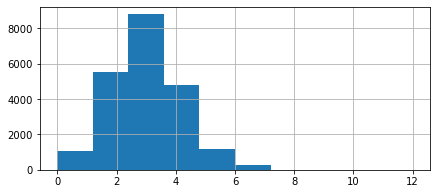

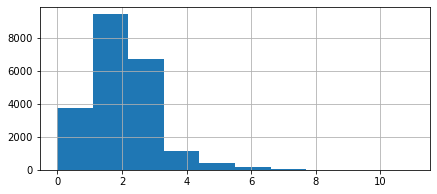

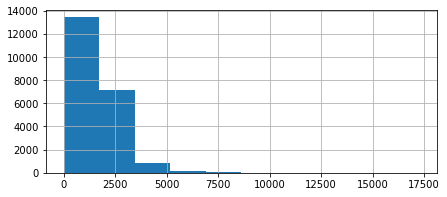

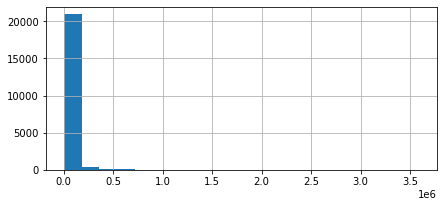

In [12]:
plt.figure(figsize=(7,3))
train.bedroomcnt.hist()
plt.figure(figsize=(7,3))
train.bathroomcnt.hist()
plt.figure(figsize=(7,3))
train.calculatedfinishedsquarefeet.hist()
plt.figure(figsize=(7,3))
train.lotsizesquarefeet.hist(bins = 20)

In [13]:
train.shape

(21605, 5)

### Split Data
    -  split_zillow(df)
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes:
    train (df), validate,  X_test, 
    '''
    
 ### Address Outliers
     - the data is heavily scewed due to outliers 
     - we will need to address this so that the data is more normaly distributed. 

In [14]:
def address_outliers_taxvaluedollarcnt(df):
    # Let's use IQR for the entire dataset
    q1 = df.taxvaluedollarcnt.quantile(.25)
    q3 = df.taxvaluedollarcnt.quantile(.75)
    q1, q3

    iqr = q3 - q1
    iqr

    multiplier = 1.5
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    # Let's filter out the low outliers
    df = df[df.taxvaluedollarcnt > lower_bound]
    # lets say give us everyhting less than the upper bound
    df = df[df.taxvaluedollarcnt < upper_bound]

    return df

In [15]:
df = address_outliers_taxvaluedollarcnt(df)

In [16]:
df.shape 

(36003, 5)

In [17]:
def address_outliers_lotsizesquarefeet(df):
    # Let's use IQR for the entire dataset
    q1 = df.lotsizesquarefeet.quantile(.25)
    q3 = df.lotsizesquarefeet.quantile(.75)
    q1, q3

    iqr = q3 - q1
    iqr

    multiplier = 1.5
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    # Let's filter out the low outliers
    df = df[df.lotsizesquarefeet > lower_bound]
    # lets say give us everyhting less than the upper bound
    df = df[df.lotsizesquarefeet < upper_bound]

    return df

In [18]:
df = address_outliers_lotsizesquarefeet(df)

In [19]:
df.shape 

(30260, 5)

In [20]:
def address_outliers_bathroomcnt(df):
    # Let's use IQR for the entire dataset
    q1 = df.bathroomcnt.quantile(.25)
    q3 = df.bathroomcnt.quantile(.75)
    q1, q3

    iqr = q3 - q1
    iqr

    multiplier = 1.5
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    # Let's filter out the low outliers
    df = df[df.bathroomcnt > lower_bound]
    # lets say give us everyhting less than the upper bound
    df = df[df.bathroomcnt < upper_bound]

    return df

In [21]:
df = address_outliers_bathroomcnt(df)

In [22]:
df.shape 

(23147, 5)

In [23]:
def address_outliers_bedroomcnt(df):
    # Let's use IQR for the entire dataset
    q1 = df.bedroomcnt.quantile(.25)
    q3 = df.bedroomcnt.quantile(.75)
    q1, q3

    iqr = q3 - q1
    iqr

    multiplier = 1.5
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    # Let's filter out the low outliers
    df = df[df.bedroomcnt > lower_bound]
    # lets say give us everyhting less than the upper bound
    df = df[df.bedroomcnt < upper_bound]

    return df

In [24]:
df = address_outliers_bedroomcnt(df)

In [25]:
df.shape 

(22901, 5)

In [26]:
def address_outliers_taxvaluedollarcnt(df):
    # Let's use IQR for the entire dataset
    q1 = df.taxvaluedollarcnt.quantile(.25)
    q3 = df.taxvaluedollarcnt.quantile(.75)
    q1, q3

    iqr = q3 - q1
    iqr

    multiplier = 1.5
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    # Let's filter out the low outliers
    df = df[df.taxvaluedollarcnt > lower_bound]
    # lets say give us everyhting less than the upper bound
    df = df[df.taxvaluedollarcnt < upper_bound]

    return df

In [27]:
df = address_outliers_taxvaluedollarcnt(df)

In [28]:
df.shape 

(22667, 5)

In [29]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
0,1125.0,3.0,2.0,0.0,289445.0
1,1316.0,3.0,2.0,5672.0,205123.0
2,1458.0,3.0,2.0,8284.0,136104.0
5,2541.0,4.0,3.0,4975.0,880456.0
6,1491.0,3.0,2.0,5000.0,107110.0


<AxesSubplot:xlabel='bathroomcnt'>

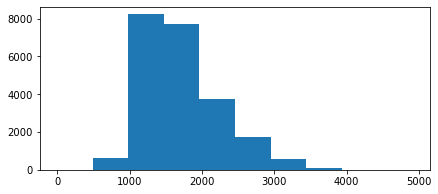

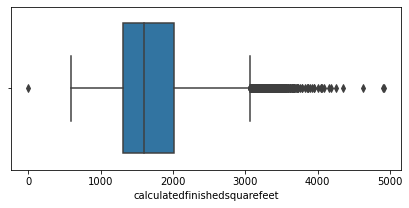

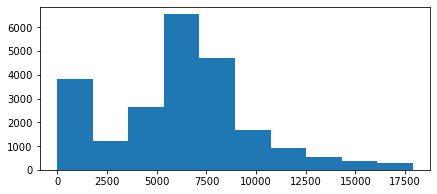

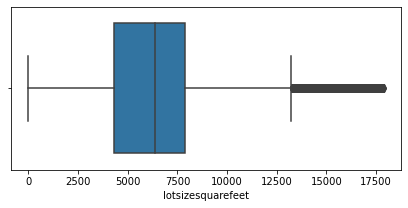

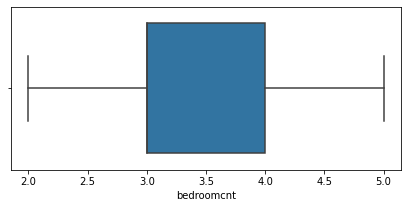

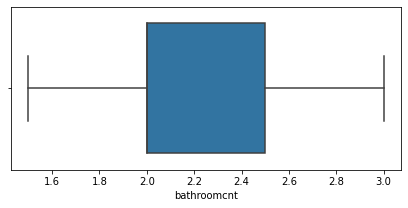

In [30]:
plt.figure(figsize=(7,3))
plt.hist(x="calculatedfinishedsquarefeet", data=df)
plt.figure(figsize=(7,3))
sns.boxplot(x="calculatedfinishedsquarefeet", data=df)
plt.figure(figsize=(7,3))
plt.hist(x="lotsizesquarefeet", data=df)
plt.figure(figsize=(7,3))
sns.boxplot(x="lotsizesquarefeet", data=df)
plt.figure(figsize=(7,3))
sns.boxplot(x="bedroomcnt", data=df)
plt.figure(figsize=(7,3))
sns.boxplot(x="bathroomcnt", data=df)

# Spilt Data


In [31]:
train, validate, test = split_zillow(df)

In [32]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
11398,1006.0,2.0,2.0,10611.0,300000.0
38573,1661.0,3.0,2.0,7000.0,141877.0
1611,1079.0,2.0,2.0,0.0,220195.0
4616,1463.0,3.0,2.0,0.0,279831.0
14630,2278.0,4.0,2.5,7140.0,701000.0


### Explore
    - def explore_univariate(X_train, quant_vars):
        for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(X_train, col)
        plt.show(p)
        print(descriptive_stats)
        
     - The data is now less skewed due to outliers
     
     - Number of Outliers removed:
     
         - calculatedfinishedsquarefeet
             - 2,579
         - lotsizesquarefeet
             - 5,743
         - bedroomcnt
             - 7,113
         - bathroomcnt
             - 246
         - taxvaluedollarcnt
             - 234

In [33]:
from explore import explore_univariate

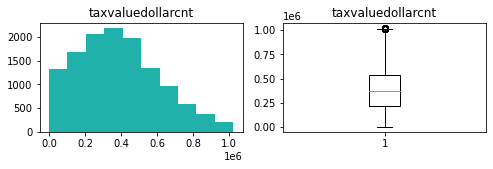

count    1.269300e+04
mean     3.890730e+05
std      2.225494e+05
min      0.000000e+00
25%      2.142000e+05
50%      3.694760e+05
75%      5.340210e+05
max      1.024228e+06
Name: taxvaluedollarcnt, dtype: float64


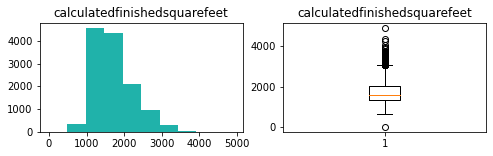

count    12693.000000
mean      1712.237611
std        530.464875
min          0.000000
25%       1310.000000
50%       1602.000000
75%       2014.000000
max       4908.000000
Name: calculatedfinishedsquarefeet, dtype: float64


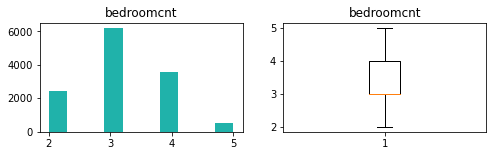

count    12693.000000
mean         3.171669
std          0.776412
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedroomcnt, dtype: float64


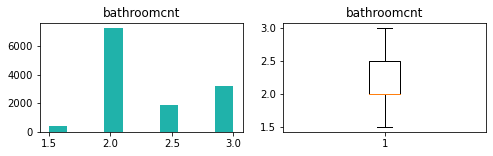

count    12693.000000
mean         2.308950
std          0.446711
min          1.500000
25%          2.000000
50%          2.000000
75%          2.500000
max          3.000000
Name: bathroomcnt, dtype: float64


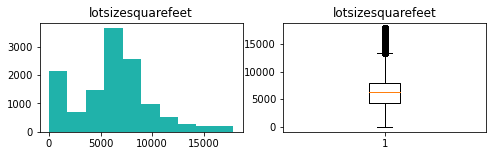

count    12693.000000
mean      6130.130072
std       3755.531959
min          0.000000
25%       4298.000000
50%       6331.000000
75%       7920.000000
max      17872.000000
Name: lotsizesquarefeet, dtype: float64


In [34]:
quant_vars = ['taxvaluedollarcnt', 'calculatedfinishedsquarefeet','bedroomcnt', 'bathroomcnt', 'lotsizesquarefeet']
explore_univariate(train, quant_vars)

### Scale Data
    def Min_Max_Scaler_2(train, validate, test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 

In [35]:
from scale import Min_Max_Scaler_2

In [36]:
X_train = train.drop(columns = ['taxvaluedollarcnt'])
X_validate = validate.drop(columns = ['taxvaluedollarcnt'])
X_test = test.drop(columns = ['taxvaluedollarcnt'])

y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)
y_test = pd.DataFrame(test.taxvaluedollarcnt)

In [37]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler_2(X_train, X_validate, X_test)

In [38]:
X_train_scaled.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet
11398,0.204971,0.000000,0.333333,0.593722
38573,0.338427,0.333333,0.333333,0.391674
1611,0.219845,0.000000,0.333333,0.000000
4616,0.298085,0.333333,0.333333,0.000000
14630,0.464140,0.666667,0.666667,0.399508


In [39]:
X_train_scaled.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet
count,12693.000000,12693.000000,12693.000000,12693.000000
mean,0.348867,0.390556,0.539300,0.343002
std,0.108082,0.258804,0.297808,0.210135
min,0.000000,0.000000,0.000000,0.000000
25%,0.266911,0.333333,0.333333,0.240488
50%,0.326406,0.333333,0.333333,0.354241
75%,0.410350,0.666667,0.666667,0.443151
max,1.000000,1.000000,1.000000,1.000000


### Explore

In [40]:
X_train = pd.concat([X_train_scaled, y_train,], axis = 1)
X_validate = pd.concat([X_validate_scaled, y_validate,], axis = 1)
X_test = pd.concat([X_test_scaled, y_test,], axis = 1)

### Needed to concat y_train onto X_train_scaled
    - I renamed X_train_scaled to X_train
    - Did this for validate and test dfs

In [41]:
X_train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt
11398,0.204971,0.000000,0.333333,0.593722,300000.0
38573,0.338427,0.333333,0.333333,0.391674,141877.0
1611,0.219845,0.000000,0.333333,0.000000,220195.0
4616,0.298085,0.333333,0.333333,0.000000,279831.0
14630,0.464140,0.666667,0.666667,0.399508,701000.0


In [42]:
from statsmodels.formula.api import ols
model = ols('taxvaluedollarcnt ~ calculatedfinishedsquarefeet + bedroomcnt + bathroomcnt + lotsizesquarefeet', data=X_train).fit()  
predictions = model.predict(X_train)

In [43]:
X_train['yhat'] = predictions
X_train['baseline'] = X_train.taxvaluedollarcnt.mean()

In [44]:
X_train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yhat,baseline
11398,0.204971,0.000000,0.333333,0.593722,300000.0,279538.799927,389072.999842
38573,0.338427,0.333333,0.333333,0.391674,141877.0,364460.340076,389072.999842
1611,0.219845,0.000000,0.333333,0.000000,220195.0,345009.927632,389072.999842
4616,0.298085,0.333333,0.333333,0.000000,279831.0,367085.503296,389072.999842
14630,0.464140,0.666667,0.666667,0.399508,701000.0,454753.731516,389072.999842


In [45]:
cor = X_train.drop(columns = ['yhat','baseline'])

<AxesSubplot:>

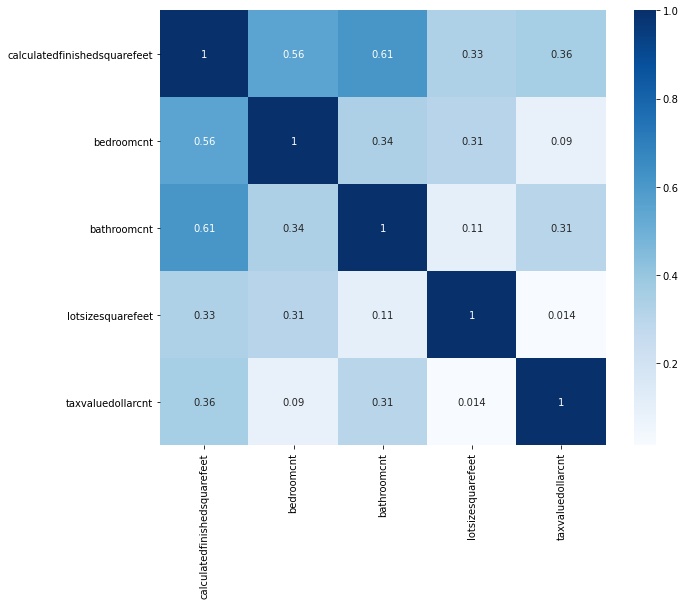

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(cor.corr(), cmap='Blues', annot=True)

# Take aways 
    - the strongest corr is calcualted square feet on the target of taxvaluesdollarcnt. 
        - corr = .36
    - The secound strongest corr is bathroomcnt.
        - corr = .31
    - Next we will want to do some stats tests to confirm

In [47]:
def hypo_test_calculatedfinishedsquarefeet(X_train):
    Ho = "No correlation between square footage and home value."
    Ha = "There IS a correlation between square footage and home value."
    confidence_level = .95
    a = 1 - confidence_level

    x1 = X_train.calculatedfinishedsquarefeet
    y1 = X_train.taxvaluedollarcnt
    plt.scatter(x1, y1)

    corr, p = stats.pearsonr(x1, y1)

    if p < a:
        print ('Reject Ho', corr, p)
    else:
        print ('Fail To Reject Ho', corr, p)

Reject Ho 0.35956928372058405 0.0


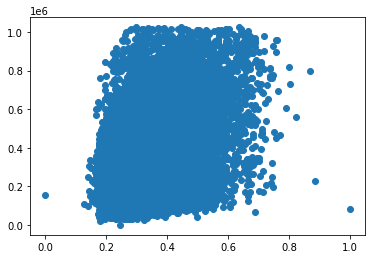

In [48]:
hypo_test_calculatedfinishedsquarefeet(X_train)

In [49]:
def hypo_test_bedroomcnt(X_train):
    Ho = "No correlation between bedroomscnt and home value."
    Ha = "There IS a correlation between bedroomscnt and home value."
    confidence_level = .95
    a = 1 - confidence_level

    x1 = X_train.bedroomcnt
    y1 = X_train.taxvaluedollarcnt
    plt.scatter(x1, y1)

    corr, p = stats.pearsonr(x1, y1)

    if p < a:
        print ('Reject Ho', corr, p)
    else:
        print ('Fail To Reject Ho', corr, p)

Reject Ho 0.09010253328261672 2.673337070000423e-24


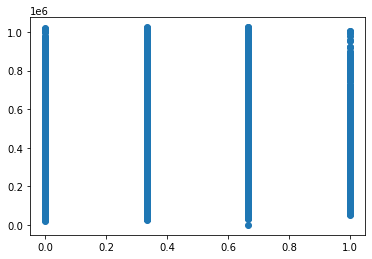

In [50]:
hypo_test_bedroomcnt(X_train)

In [51]:
def hypo_test_bathroomcnt(X_train):
    Ho = "No correlation between bathroomcnt and home value."
    Ha = "There IS a correlation between bathroomcnt and home value."
    confidence_level = .95
    a = 1 - confidence_level

    x1 = X_train.bathroomcnt
    y1 = X_train.taxvaluedollarcnt
    plt.scatter(x1, y1)

    corr, p = stats.pearsonr(x1, y1)

    if p < a:
        print ('Reject Ho', corr, p)
    else:
        print ('Fail To Reject Ho', corr, p)

Reject Ho 0.3053424105186041 4.4778333584956925e-272


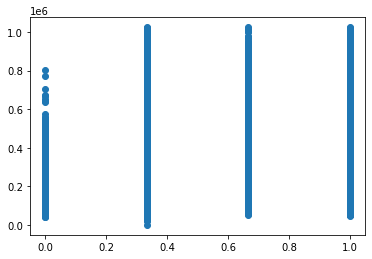

In [52]:
hypo_test_bathroomcnt(X_train)

In [53]:
def hypo_test_lotsizesquarefeet(X_train):
    Ho = "No correlation between lotsizesquarefeet and home value."
    Ha = "There IS a correlation between lotsizesquarefeet and home value."
    confidence_level = .95
    a = 1 - confidence_level

    x1 = X_train.lotsizesquarefeet
    y1 = X_train.taxvaluedollarcnt
    plt.scatter(x1, y1)

    corr, p = stats.pearsonr(x1, y1)

    if p < a:
        print ('Reject Ho', corr, p)
    else:
        print ('Fail To Reject Ho', corr, p)

Fail To Reject Ho 0.0140217754820484 0.11418466464281757


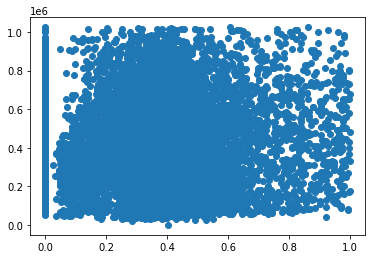

In [54]:
hypo_test_lotsizesquarefeet(X_train)

### Take Aways 
    - there is some corr with features: square feet, bathroomcnt, bedroomcnt.
    - there seems to be no correlation with lot size with the target.
        - Id like to see which lot sizes are in each pips code. and then run the pips aginst the target to see how pips relate to the target.
### Evaluate

In [55]:
X_train['residual'] = X_train.taxvaluedollarcnt - X_train.yhat
X_train['baseline_residual'] = X_train.taxvaluedollarcnt - X_train.baseline
print('------------------------------------------------------')
SSE = (X_train.residual**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')
SSE_baseline = (X_train.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')
print('------------------------------------------------------')
MSE = SSE/len(X_train)
print(f' The MSE of the OLS model is {round(MSE,1)}')
MSE_baseline = SSE_baseline/len(X_train)
print(f' The MSE of the baseline model is {round(MSE_baseline,1)}')
print('------------------------------------------------------')
RMSE = mean_squared_error(X_train.taxvaluedollarcnt, X_train.yhat, squared = False)
print(f' The RMSE of the OLS model is {round(RMSE,1)}')
RMSE_baseline = mean_squared_error(X_train.taxvaluedollarcnt, X_train.baseline, squared = False)
print(f' The RMSE of the baseline model is {round(RMSE_baseline,1)}')
print('------------------------------------------------------')


------------------------------------------------------
 The SSE of the OLS model is 525196817076446.5
 The SSE of the baseline model is 628612194691278.0
------------------------------------------------------
 The MSE of the OLS model is 41376886242.5
 The MSE of the baseline model is 49524320073.4
------------------------------------------------------
 The RMSE of the OLS model is 203413.1
 The RMSE of the baseline model is 222540.6
------------------------------------------------------


In [56]:
import numpy as np
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])
df_eval

,metric,model_error
0,SSE,5.251968e+14
1,MSE,4.137689e+10
2,RMSE,2.034131e+05


In [57]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])
df_eval

,metric,model_error,baseline_error
0,SSE,5.251968e+14,6.286122e+14
1,MSE,4.137689e+10,4.952432e+10
2,RMSE,2.034131e+05,2.225406e+05


In [58]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,5.251968e+14,6.286122e+14,True
1,MSE,4.137689e+10,4.952432e+10,True
2,RMSE,2.034131e+05,2.225406e+05,True


In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     624.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:58:59   Log-Likelihood:            -1.7316e+05
No. Observations:               12693   AIC:                         3.463e+05
Df Residuals:                   12688   BIC:                         3.464e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.367e+05   6252.701     21.858      0.000    1.24e+05    1.49e+05
calculatedfinishedsquarefeet  8.088e+05   2.47e+04     32.803      0.000     7.6e+05    8.57e+05
bedroomcnt                   -1.236e+05   8508.937    -14.528      0.000    -1.4e+05   -1.07e+05
bathroomcnt                   9.158e+04   7734.346     11.840      0.000    7.64e+04    1.07e+05
lotsizesquarefeet            -9.001e+04   9306.116     -9.672      0.000   -1.08e+05   -7.18e+04
==============================================================================
Omnibus:                      268.529   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.622
Skew:                           0.334   Prob(JB):                     2.83e-59
Kurtosis:                       2.745   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Take Aways
    - RMSE proves to have the best fit for the data and is better than baseline model
    - R^2 values is = .165 (low due to low number of features, to imporve add more featurs into model or do some FE)
### Details:  
    - calcualted square feet has a coef = 8.088e+05 (the mean response value increases by 8.088e+05 for every one unit change in the target.)
    - bedroomcnt has a coef = -1.236e+05 (the mean response value increases by -1.236e+05 for every one unit change in the target.)
    - bathroomcnt has a coef = 9.158e+04 (the mean response value increases by 9.158e+04 for every one unit change in the target.)
    - lotsizesquarefeet has a coef = -9.001e+04 (the mean response value increases by -9.001e+04 for every one unit change in the target.)

In [60]:
baseline_mean = y_train['taxvaluedollarcnt'].mean()
baseline_med = y_train['taxvaluedollarcnt'].median()
y_train['baseline_mean'] = baseline_mean
y_train['baseline_med'] = baseline_med

y_validate['baseline_mean'] = baseline_mean
y_validate['baseline_med'] = baseline_med

In [61]:
y_train.head()

,taxvaluedollarcnt,baseline_mean,baseline_med
11398,300000.0,389072.999842,369476.0
38573,141877.0,389072.999842,369476.0
1611,220195.0,389072.999842,369476.0
4616,279831.0,389072.999842,369476.0
14630,701000.0,389072.999842,369476.0


In [62]:
# 2. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_med) ** (0.5)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_med) ** (0.5)

rmse_train1 = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_mean) ** (0.5)
rmse_validate1 = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_mean) ** (0.5)

print(f"""
          BASELINE:

          RMSE using Median
          Train/In-Sample: {round(rmse_train, 2)}
          Validate/Out-of-Sample: {round(rmse_validate, 2)}
            """)
print(f"""
          BASELINE:

          RMSE using Mean
          Train/In-Sample: {round(rmse_train1, 2)}
          Validate/Out-of-Sample: {round(rmse_validate1, 2)}
            """)


          BASELINE:

          RMSE using Median
          Train/In-Sample: 223401.8
          Validate/Out-of-Sample: 222848.03
            

          BASELINE:

          RMSE using Mean
          Train/In-Sample: 222540.6
          Validate/Out-of-Sample: 221878.87
            


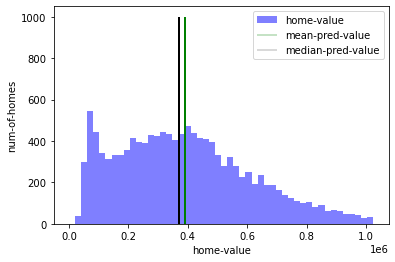

In [64]:
import matplotlib.ticker as plticker
# plot to visualize actual vs predicted. 
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="home-value", bins = 50)
plt.vlines(y_train.baseline_mean, 0, 1000, color='green', alpha=.3, label="mean-pred-value")
plt.vlines(y_train.baseline_med, 0, 1000, color='black', alpha=.2, label="median-pred-value")
plt.xlabel("home-value")
plt.ylabel("num-of-homes")
plt.legend()
plt.show()

# Modeling
    - Run on OLS, Lassolars, and Tweedie

In [65]:
y_train.head()

,taxvaluedollarcnt,baseline_mean,baseline_med
11398,300000.0,389072.999842,369476.0
38573,141877.0,389072.999842,369476.0
1611,220195.0,389072.999842,369476.0
4616,279831.0,389072.999842,369476.0
14630,701000.0,389072.999842,369476.0


In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# OLS

In [67]:
X_train = X_train.drop(columns=['taxvaluedollarcnt','baseline_residual', 'residual','yhat' ])

In [68]:
# create the model object (Best Model)
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(0.5)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(0.5)

print(f"""
        BASELINE:
              
        RMSE using Median
        Train/In-Sample: {round(rmse_train, 2)}
        Validate/Out-of-Sample: {round(rmse_validate, 2)}

        RMSE for OLS using LinearRegression
    
        Training/In-Sample: {round(rmse_train_lm, 2)}
        Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
        
        """)



        BASELINE:
              
        RMSE using Median
        Train/In-Sample: 223401.8
        Validate/Out-of-Sample: 222848.03

        RMSE for OLS using LinearRegression
    
        Training/In-Sample: 203413.09
        Validation/Out-of-Sample: 95057.23
        
        


# LassoLars

In [69]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(0.5)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(0.5)

print(f"""
        RMSE for LassoLars
    
        Training/In-Sample: {round(rmse_train_lars, 2)}
        Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
        
        """)


        RMSE for LassoLars
    
        Training/In-Sample: 203413.28
        Validation/Out-of-Sample: 202749.6
        
        


# Tweedie

In [72]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  211366.09099050643 
Validation/Out-of-Sample:  211366.09099050643


# Polly Reg/ Features

In [73]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [74]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  203413.09260352698 
Validation/Out-of-Sample:  95057.23325602515


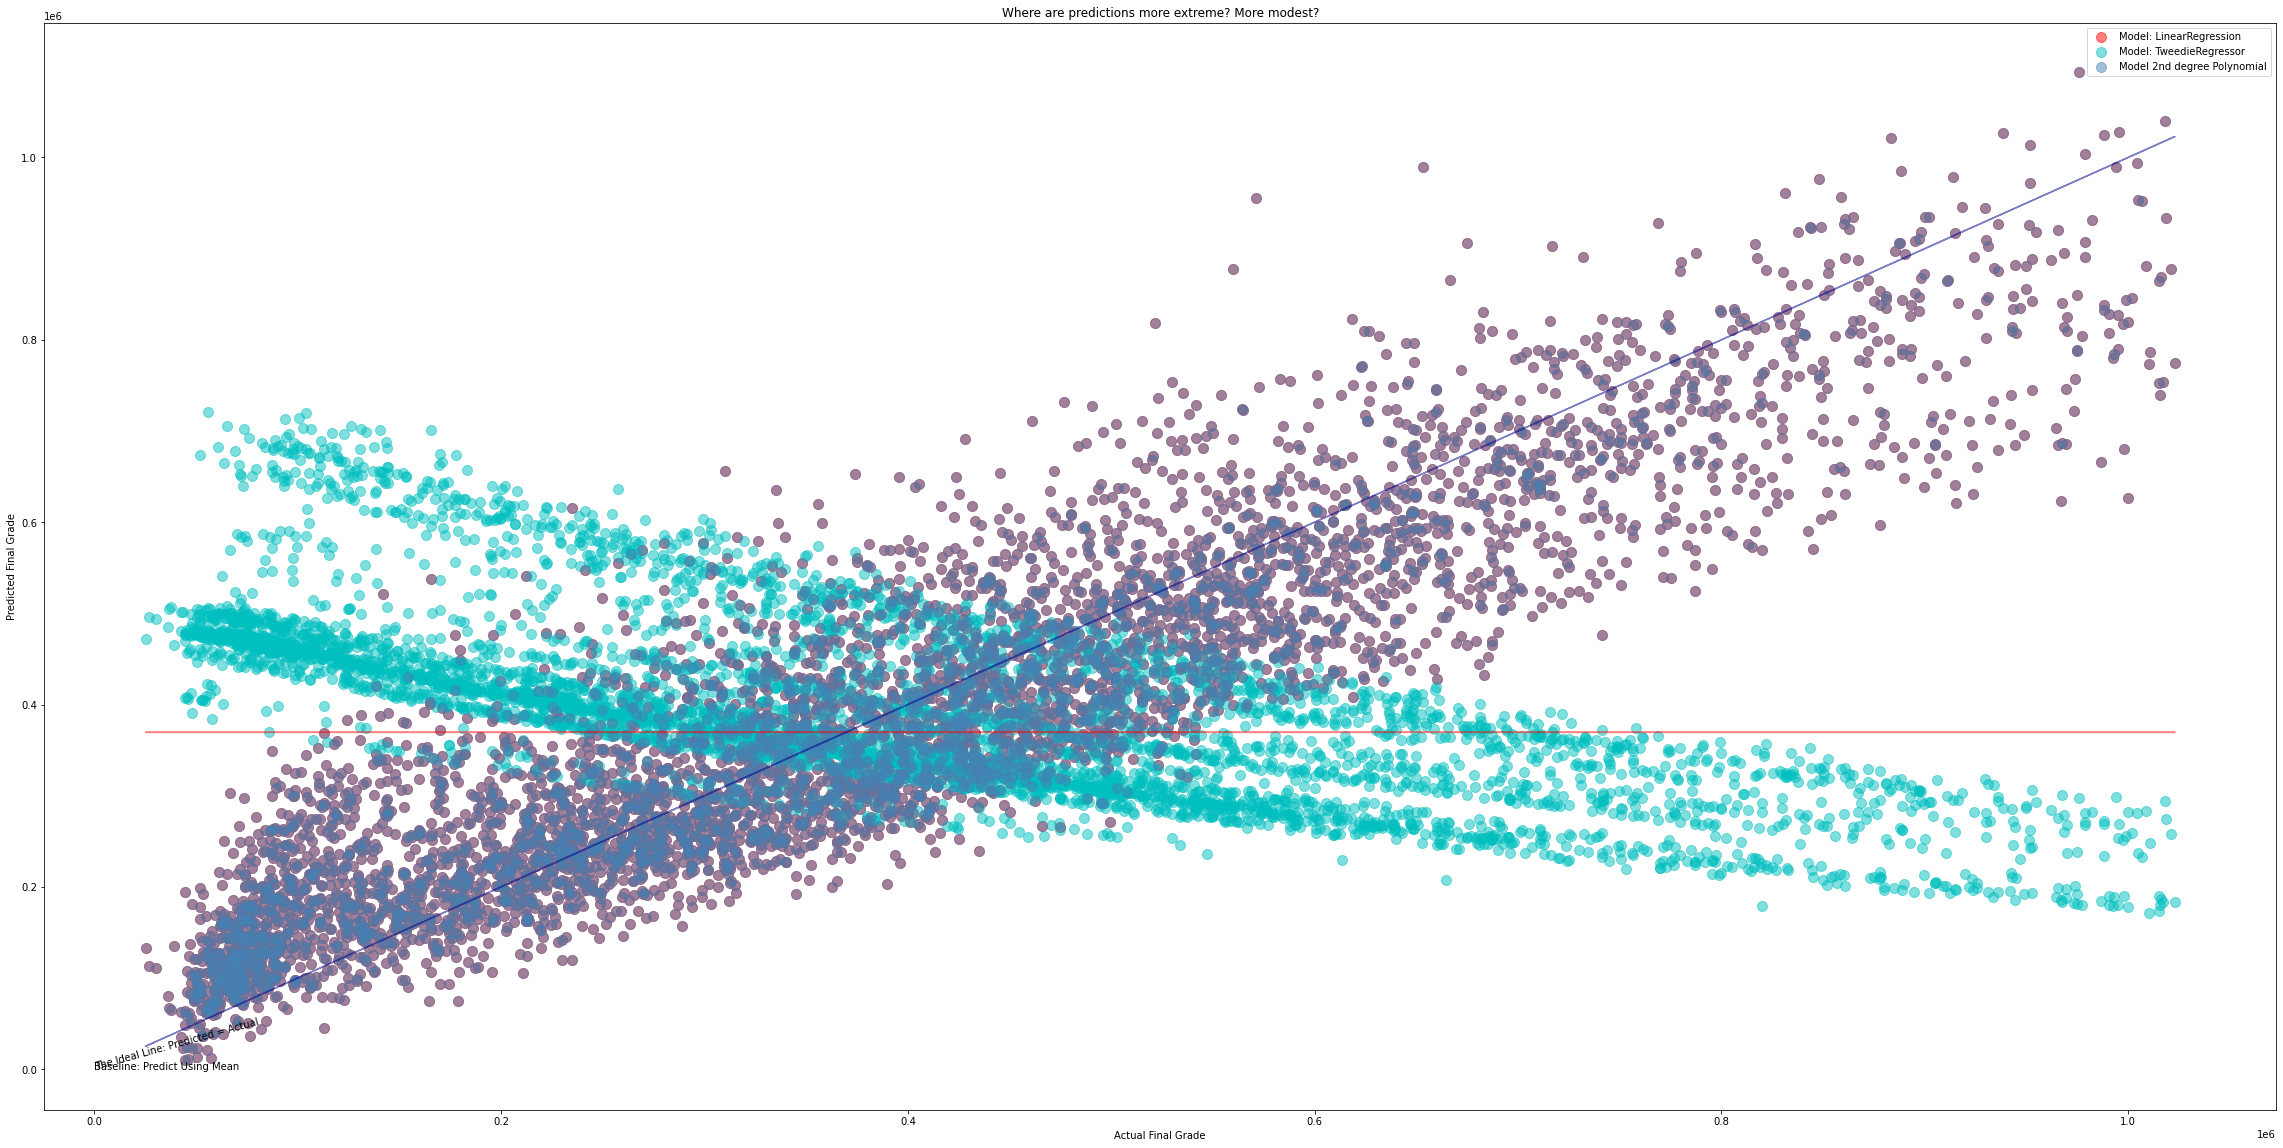

In [75]:
# y_validate.head()
plt.figure(figsize=(40,20))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.baseline_med, alpha=.5, color="Red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="Darkblue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="c", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2, 
            alpha=.5, color="steelblue", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

